In [625]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()

from sklearn.cluster import KMeans 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Problem 1: Clustering

### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### Data Dictionary :
1.	spending: Amount spent by the customer per month (in 1000s)
2.	advance_payments: Amount paid by the customer in advance by cash (in 100s)
3.	probability_of_full_payment: Probability of payment done in full by the customer to the bank
4.	current_balance: Balance amount left in the account to make purchases (in 1000s)
5.	credit_limit: Limit of the amount in credit card (10000s)
6.	min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7.	max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


### Load the data file

In [713]:
data = pd.read_csv('bank_marketing_part1_Data.csv')

### Checking the data

In [714]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [715]:
data.shape



(210, 7)

##### Shape of data is with 210 rows and 7 columns means we have 210 observations consist of 7 features

In [716]:
data.info()

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


#### Now we can say that there is not any data point is missing in any feature.
#### And all first 7 features are of float64 type . 
#### And indexes are from 0 to 209 for 210 entries.

### Checking the Summary Statistic

In [718]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


inferences from the descriptive statistics:
1. The average age of travelers is 38 years where as median age value is 36 years, Therefore
we can say that data is skewed towards right and high age travelers are there. Very high
value of max age compared to median age value shows that there are outliers as well.
2. The median value of sales is only 33 where as mean value is 60.25, it means low valued
sales are in large number.
3. The first quartile commision value is zero which indicates that company is not getting
commision on 25% of the insurances booked.
4. The average value of commision is 14.53 with median value of 4.6 which shows that major
part of earning of company is from specific chunk of travellers.
5. There are 4 tour firms and maximum number of insurances is booked by firm "EPX" with
1365 insurances out of 3000 insurances .
6. There are two types of tour insurance firms and "Travel Agency" is booking maximum 1837
out of total 3000 booked insurances. 
7. There are 2076 not claimed travelers but still approximately 33% of travellers are claiming,
which is very high.
8. Distribution channel used is online for booking 2954 insurances out of total booked 3000
insurances.
9. Out of 5 products "Customised Plan" is most bought by the travellsers and is 1136 out of
3000, which is 33% of total travellers.
10. Out of three destinations ASIA is most favourite and is travelled by 2465 travellers out of
3000 cases.
Anomalies in data set:
1. Minimum value of tour duration is showing in negative value. It must be treated.
2. The maximum time duration is 4580 with only sales value of 0.32 need to be cross verified. 

### BoxPlots for all the features to check for outliers

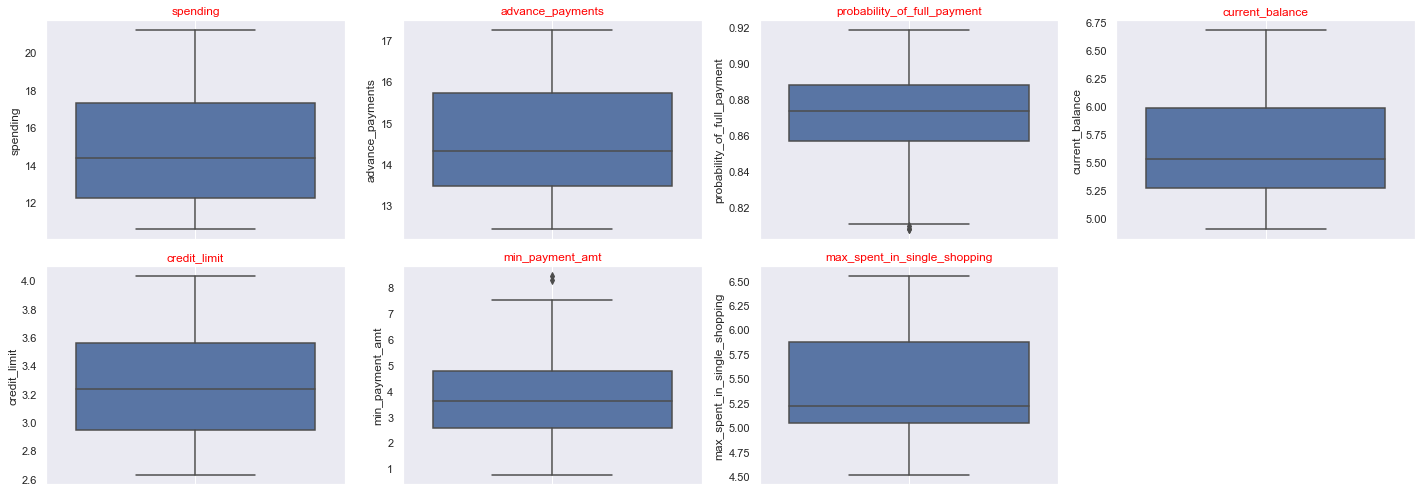

In [719]:

fig=plt.figure(figsize=(20,7))                                      # setting figure size 

for i in range(0,len(data.columns)):                                # defining range of i
    
    ax = fig.add_subplot(2,4,i+1)                                   #  adding a new subplot every time (i+1)
    sns.boxplot(y=data[data.columns[i]])                            #  box plt
    ax.set_title(data.columns[i],color='Red')                       # setting title for the ith  axis
    plt.grid()                                                      # plotting grid
plt.tight_layout()
  

#### From above box-plot We can say that there are outliers in two features only, "probability_of_full_payment" and "min_payment_amt"

### Distribution plot:

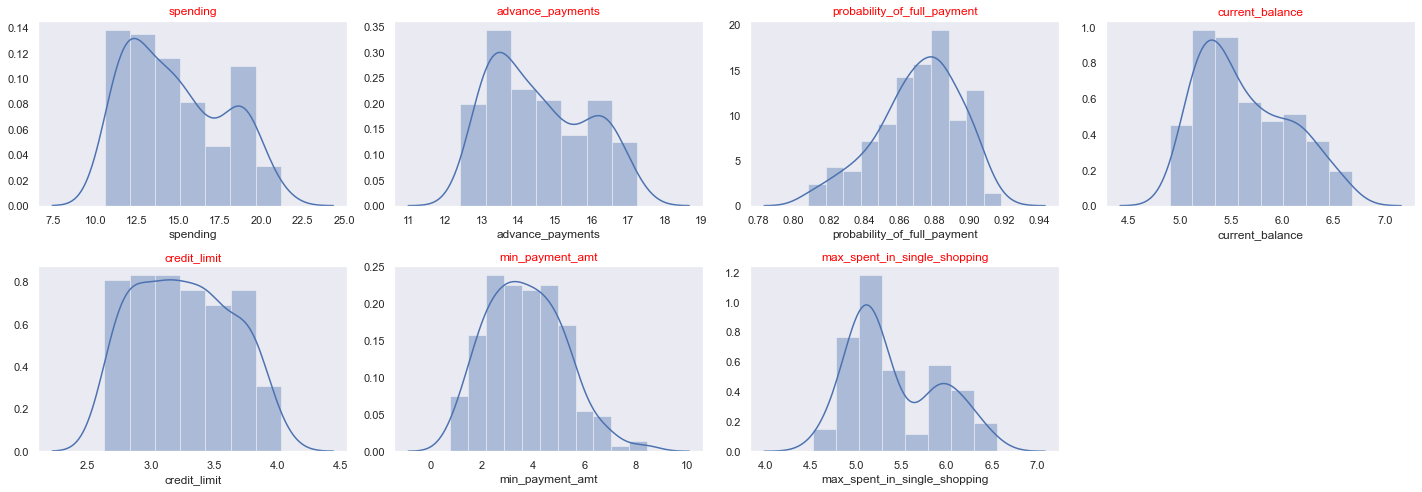

In [720]:
fig=plt.figure(figsize=(20,7))                                     # setting figure size 

for i in range(0,len(data.columns)):                           # defining range of i
    
    ax = fig.add_subplot(2,4,i+1)      #  adding a new subplot every time (i+1)
    sns.distplot(data[data.columns[i]])      #  box plt
    ax.set_title(data.columns[i],color='Red')   # setting title for the ith  axis
    plt.grid()                                # plotting grid
plt.tight_layout()


### From above dist plot we can observe:
* Distribution pattern of different features.
* Important point to note that "Spending" is multi modal at 11.23, 14.11 and 15.38, which indicates that number of customers are high with these spending amounts and can be utilised for creating promotional offers which will have more success rate. 


In [722]:
data.mode() 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,11.23,13.47,0.8823,5.236,3.026,2.129,5.001
1,14.11,NaN,NaN,5.395,NaN,2.221,NaN
2,15.38,NaN,NaN,NaN,NaN,2.700,NaN


In [723]:
data.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

#### Checking correlation B/W features

In [725]:
data.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


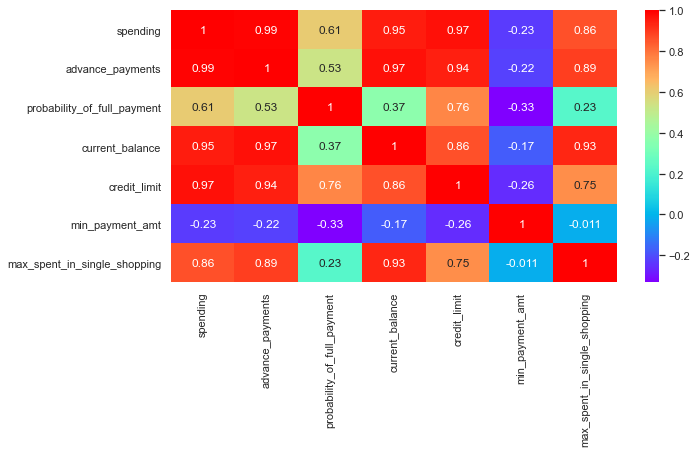

In [726]:
plt.figure(figsize=(10,5));
sns.heatmap(data.corr(),annot=True,cmap='rainbow',linecolor='white',);

### Coorelation and Heatmap observations:
We can see that many features are highly corelated and hence are contributing common info in this data set.

Features-

"Spending" and "advance payment"

"Spending" and "credit_limit"

"advance payment" and "current_balance"

"current_balance" and "max_spent_in_single_shopping"

### Are higly correlated .

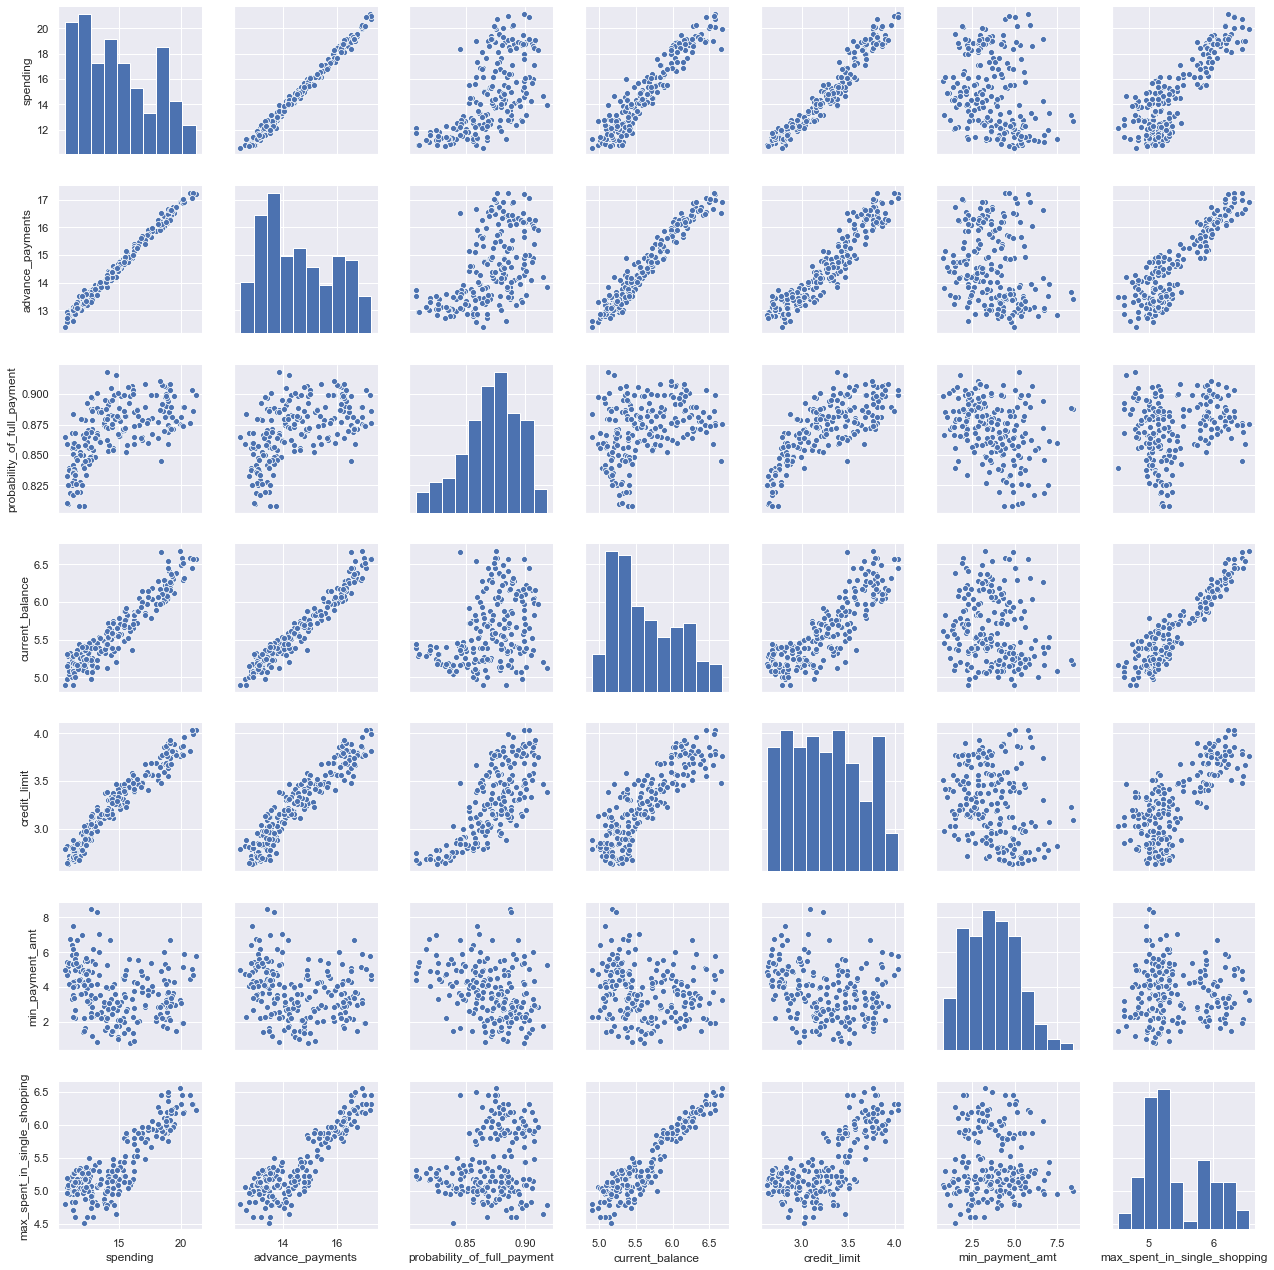

In [727]:
sns.pairplot(data);

In [728]:
# There is no duplicate data

data.duplicated().sum()

0

### Therefore we can say that there is no duplicate record/observation.

### Outlier Detection and Treatment:
* As clustering is sensitive to outliers, we must treat them but carefully and as per need of the specific case and to exploit thses information as well in favour of business as much as possible aside keeping in mind the focus of clustering for major part of records should not be compromised.
### Reasons for imputing the outliers compared to dropping them if outliers are in very less numbers:
* But instead of removing them its better to cap and floor (We will use upper/lower limit capping) so that we can segment these customers in nearby clustres and can have chance of some offers to become suitable for them out of many planned for promotions. 
* Also from boxplot we can see that outliers are not faraway from the min or max values of the features and therefore we can have a promotional plans similar to the clusters near by them and this can be done by imputing the outliers by cap and floor method. 
* And as clustering predominantly works on understanding the central tendency of respective clusters,therefore  any outlier will impact its understanding of central tendency which is not good for preparing promotional offers for that cluster/segment pf customers.

In [729]:
def get_outliers(col):
    Q3=np.percentile(data[col],75) # value at 75 percentile
    Q1=np.percentile(data[col],25)  # value at 25 percentile
    IQR=Q3-Q1  # range
    Upper_limit=Q3 + 1.5 *(Q3 - Q1)
    Lower_limit=Q1 - 1.5 *(Q3 - Q1)
    outliers=data[(data[col]>Upper_limit) | (data[col]<Lower_limit) ]
    outlier_description= 'outliers in case of  ' + col + ' of  data.'
    print('There are', len(outliers), outlier_description)
    
    


# Looping
columns  = list(data) # providing list for variable col.
for col in columns:
    get_outliers(col)

There are 0 outliers in case of  spending of  data.
There are 0 outliers in case of  advance_payments of  data.
There are 3 outliers in case of  probability_of_full_payment of  data.
There are 0 outliers in case of  current_balance of  data.
There are 0 outliers in case of  credit_limit of  data.
There are 2 outliers in case of  min_payment_amt of  data.
There are 0 outliers in case of  max_spent_in_single_shopping of  data.


In [730]:
# Treating outliers

def Treat_outliers(col):
    Q3=np.percentile(data[col],75) # value at 75 percentile
    Q1=np.percentile(data[col],25)  # value at 25 percentile
    IQR=Q3-Q1  # range
    Upper_limit=Q3 + 1.5 *(Q3 - Q1)
    Lower_limit=Q1 - 1.5 *(Q3 - Q1)
    data[col]=np.where(data[col]>Upper_limit,Upper_limit,data[col])      # capping with upper limit
    data[col]=np.where(data[col]<Lower_limit,Lower_limit,data[col])      # capping with lower limit


# Looping
columns  = list(data) # providing list for variable col.
for col in columns:
    Treat_outliers(col)


### Check after outlier treatment

In [731]:
def get_outliers(col):
    Q3=np.percentile(data[col],75) # value at 75 percentile
    Q1=np.percentile(data[col],25)  # value at 25 percentile
    IQR=Q3-Q1  # range
    Upper_limit=Q3 + 1.5 *(Q3 - Q1)
    Lower_limit=Q1 - 1.5 *(Q3 - Q1)
    outliers=data[(data[col]>Upper_limit) | (data[col]<Lower_limit) ]
    outlier_description= 'outliers in case of  ' + col + ' of  data.'
    print('There are', len(outliers), outlier_description)
    
    


# Looping
columns  = list(data) # providing list for variable col.
for col in columns:
    get_outliers(col)

There are 0 outliers in case of  spending of  data.
There are 0 outliers in case of  advance_payments of  data.
There are 0 outliers in case of  probability_of_full_payment of  data.
There are 0 outliers in case of  current_balance of  data.
There are 0 outliers in case of  credit_limit of  data.
There are 0 outliers in case of  min_payment_amt of  data.
There are 0 outliers in case of  max_spent_in_single_shopping of  data.


### 1.2 Do you think scaling is necessary for clustering in this case? Justify 5

In [732]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


###  From above data features magnitude and summary of data sets we can see that-
* 1. Scale of features "spending" and "advance_payments" is 100times bigger than the scales of the features "probability_of_full_payment" and also 10 times bigger than rest of features.

* 2. It can be noted here that the high magnitude of feature  'spending" will affect more while claculating  the distance between the two points than the others features in different scales creating a more biasness towards higher scale manitude features compared to small scale features. This will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude ("spending" & advance_payments in this case).
* 3. We do not want our algorithm to be affected by the magnitude of these variables. The algorithm should not be biased towards variables due to higher magnitude of scales . To overcome this problem, we can bring down all the variables to the same scale. 
* 4. One of the most common technique to do so is to use StandardScaler where we calculate the mean and standard deviation of the variable. Then for each observation, we subtract the mean and then divide by the standard deviation of that variable: 

In [733]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)
scaled_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


### Q 1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4.5). 7.5

### Creating the Dendrogram

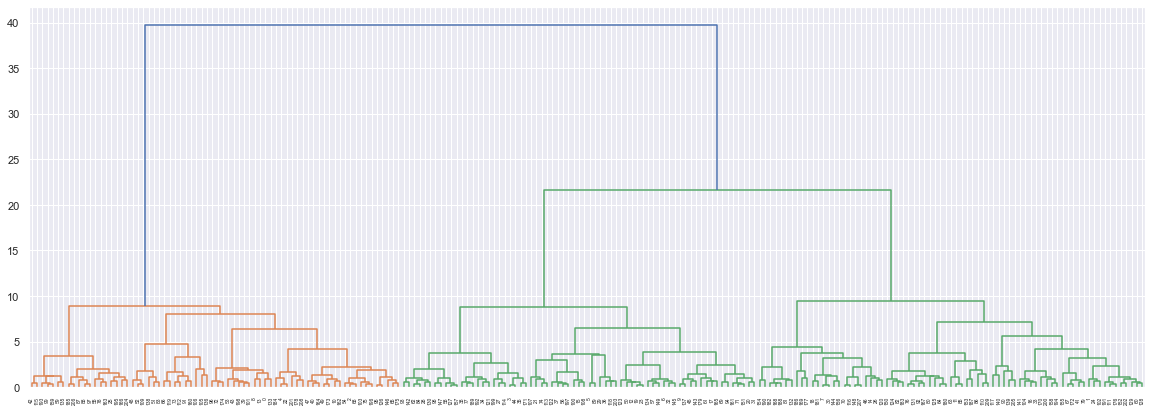

In [734]:
from scipy.cluster.hierarchy import dendrogram, linkage
HClust = linkage(scaled_data, method = 'ward',metric='euclidean')
plt.figure(figsize=(20,7))
dend = dendrogram(HClust)

### From above dendrogram we can say that
* There are two clusters formed very clearly , if we cut the dendrogram on basis of highest dissimilarities between the clusters and what the output is showing in different colors.
* But we can take three clusters as well from the above dendrogram because the two sub clusters of green one has high dissimilarity between them and similarity within respective clusters. 
* Also because one cluster contains 67% of customer base and that is too high to prepare a very suitable promotional offer   which can attract equally to all customer of this large range of customer.
* As three clusters are also showing clear separation from each other at the level that we can  create three  distinguished   and suitable  sets of promotional offers for each of customer segments and more customized product to customers as per   their central tendency of behaviour of purchasing, we will move with three clusters.

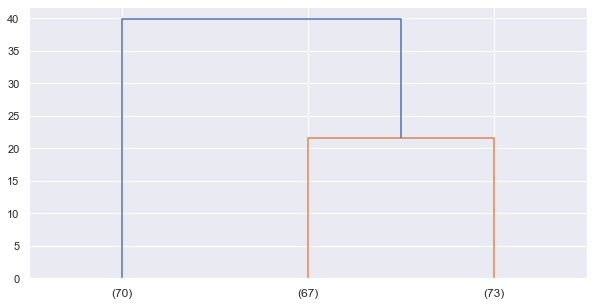

In [735]:
plt.figure(figsize=(10,5))
dend = dendrogram(HClust,truncate_mode='lastp',p = 3,)

### Importing fcluster module to create clusters

In [736]:
from scipy.cluster.hierarchy import fcluster

In [737]:
# clustering the data set using criterion of max cluster
H_clusters = fcluster(HClust, 3, criterion='maxclust')


### Appending clusters to original dataset

In [738]:
# adding a column called H_clusters to the dataframe. clustered labels gets added to the column clusters 
data['H_clusters']=H_clusters
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


### Cluster Frequency : (Number of customers in each segment)
* There is cluster label 1 which has 70 customers, cluster 2 has 67 customers, cluster 3 has 73 customers

In [740]:
data.H_clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: H_clusters, dtype: int64

## Q 1.4 Apply K-Means clustering on scaled data and determine optimum clusters (3 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (1.5 pts).	7.5



#### Apply K-Means clustering on scaled data

In [741]:
from sklearn.cluster import KMeans
k_means=KMeans()
k_means.fit(scaled_data)

KMeans()

#### Calculating WSS for different values of K 

In [742]:
from sklearn.cluster import KMeans

WSS=k_means.inertia_
WSS = []
for i in range(1,8):
    k_means = KMeans(n_clusters=i,random_state=1)
    k_means.fit(scaled_data)
    WSS.append(k_means.inertia_)


WSS

[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 371.221763926848,
 326.8846407681858,
 290.15133123739645,
 263.0291032947617]

### Elbow Method-to find the opitmum number of clusters

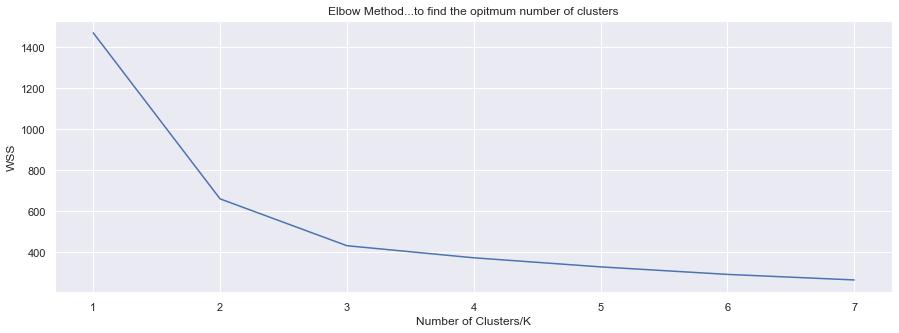

In [743]:

plt.figure(figsize=(15,5))
plt.plot(range(1,8), WSS)
plt.xlabel('Number of Clusters/K')
plt.ylabel("WSS")
plt.title("Elbow Method...to find the opitmum number of clusters")
plt.show()

### Note:
* From above we can choose the number of optimum clusters as  3 .
* But we can decide it further by using minimum value of silhouette widths of respective K .

#### Modelling with different k values

####  silhouette score Analysis :
Note: silhouette score is a measure of how well clusters/segmentations are of customers are done.

In [744]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [745]:
sil_score=[]
sil_width=[]
for k in range(2,8):
    k_means=KMeans(n_clusters=k).fit(scaled_data)
    sil_score.append([k,silhouette_score(scaled_data,k_means.labels_)])
    sil_width.append([k,min(silhouette_samples(scaled_data,k_means.labels_))])
    


Silhoute_score=pd.DataFrame(sil_score,columns=['k','sil_score'])
Silhoute_width=pd.DataFrame(sil_width,columns=['k','sil_width'],)
print(Silhoute_width)
print('\n')
print(Silhoute_score)


   k  sil_width
0  2  -0.005677
1  3   0.002769
2  4  -0.020682
3  5  -0.072656
4  6  -0.094737
5  7  -0.028262


   k  sil_score
0  2   0.465601
1  3   0.400806
2  4   0.337366
3  5   0.286487
4  6   0.284488
5  7   0.264410


####  plotting silhouette scores for different number of clusters

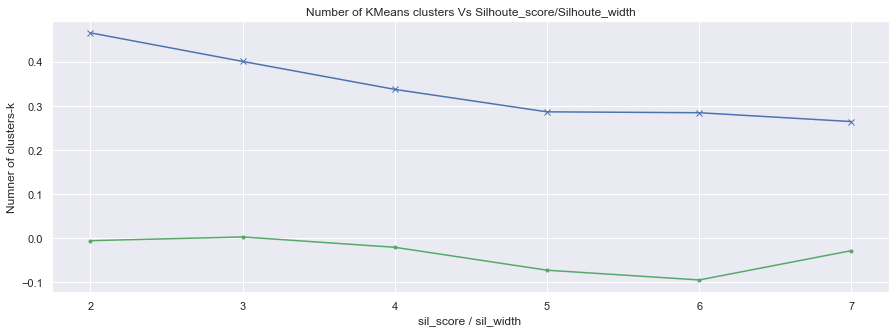

In [746]:

plt.figure(figsize=(15,5))
plt.plot(Silhoute_score['k'],Silhoute_score['sil_score'],'x-');
plt.plot(Silhoute_width['k'],Silhoute_width['sil_width'],'.-g')
plt.xlabel('sil_score / sil_width ');
plt.ylabel('Numner of clusters-k');
plt.title('Number of KMeans clusters Vs Silhoute_score/Silhoute_width');

plt.show()

### Explaination for deciding  optimum number of clusters:
* Above graph showing values of silhouette scores and minimum silhouette width at different values of k (number of clusters).
* For K=2 , silhouette score is although highest but minimum value of silhouette is negative which also indicates that some customers are not properly segmented.
* Where as for k=3 , we get silhouette score second highest as well as minimum value of silhouette width is positive , which clearly indicates that all customers are segmented properly.
* Therefore we are choosing k=3.

### Creating KMeans Clustering with k = 3 and Appending Clusters to the original dataset

In [747]:
k_means = KMeans(n_clusters=3,random_state=1)
k_means.fit(scaled_data)
labels = k_means.labels_
data['k_means_clusters']= labels
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,k_means_clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0


In [748]:
data.k_means_clusters.value_counts().sort_index()

0    67
1    72
2    71
Name: k_means_clusters, dtype: int64

### Cluster Frequency : (Number of customers in each segment)
* cluster label 0  has 67 customers
* cluster label 1  has 72 customers
* cluster label 2 has 71 customers

## 1.5 Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ).	5

## Different Profiles for H_clusters

In [749]:
clust_profile=data.drop('k_means_clusters',axis=1)
clust_profile=clust_profile.groupby('H_clusters').mean()
clust_profile['freq']=data.H_clusters.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
H_clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


* Cluster 1: This segment of customers is with highest average (spending, advance_payments,probability_of_full_paymen, current_balance,credit_limit and max_spent_in_single_shopping). This cluster is covering high spending customers.

* Cluster 2: This segment of customers has lowest average (spending , advance payments, probability of full payment,credit_limit and credit_limit but better average on front of max_spent_in_single_shopping than segment 3 of customers and highest min_payment_amt being paid while purchase. This cluster is covering lowest spending customers.

* Cluster 3: This segment of customers has medium spending and all other features. This cluster is covering an important chunk of customers who are spending good on average. 

### Different Profiles for k_means clusters

In [750]:
clust_profile=data.drop('H_clusters',axis=1)
clust_profile=clust_profile.groupby('k_means_clusters').mean()
clust_profile['freq']=data.k_means_clusters.value_counts().sort_index()
clust_profile 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
k_means_clusters,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


## Some Recommendations

1.	The customers in cluster1 of Hierarchcal and 0 of KMeans has high spending trend compared to rest of clusters but credit limit of this segment of customers should be increased aside to increase the max_spent_in_single_shopping amount by providing good promotional offers.
2.	Credit card is being used by customers for regular purchasing as well as for emergency purpose.Therefore credit limit is very important factor for them ,for rgular purchasing and also sufficient left over balance for emergency use of credit limit of card must be sufficient. Therefore if we are giving promotional offers to increase the credit limit if spending on the card is increased by x% by the cardholder will increase the spendings.
3.	Note that "min_payment_amt" while purchasing is actually use of cash or debit card by the Customers. We must work on this point to reduce the use of cash/debit card by customer and should promote the customers to increase the use of credit card in place of using cash/debit card for payment while purchasing.
4.	The probability of full payment is showing that some amount is remaining unpaid by card holders and we can offer them to convert these amounts in form of loans for certain durations to avoid high charges of bank after dead line. This will not only provide good earning but will increase satisfaction and less churning of customers because of high charges due to unpaid amount even after deadline. This will also increse spending pattern of customers.


                                ### End of Prob1

###                          Problem 2: CART-RF-ANN

#### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

2.5 Inference: Basis on these predictions, what are the business insights and recommendations

### Attribute Information:
1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)


## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check (3 pts), Interpret the inferences from the descriptive statistics in a detailed manner (2 pts).	5


In [701]:
# reading the data set
df = pd.read_csv('insurance_part2_data.csv')

In [702]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


#### Descriptive statistics and null value condition check:

In [703]:
df.shape

(3000, 10)

In [704]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


#### Note: From above we can say that there is no standard or non-standard null value. All data types are as per data should be.

In [705]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [706]:
df.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


### Interpretation of  the inferences from the descriptive statistics:

#### Anomolies in data set:
1. Minimum value of tour duration is shwoing in negative value. It must be treated.
2. The maximum time duration is 4580 with only sales value of 0.32 needd to be cross varified.


1. The average age of travelers is 38 years where as median age value is 36 years, Therefore we can say that data is skewed towards right and high age travellers are there.Very high value of max age compared to median age value  shows that there are outliers as well.
2. The median value of sales is only 33 where as mean value is 60.25, it means low valued sales are in large number.

3. The first quartile commision value  is zero which indicates that company is not getting commision on 25% of the insurances booked. 
4. The average value of commision is 14.53 with median value of 4.6 which shows that major part of earning of company is from specific chunk of travellers.
5. There are 4 tour firms and maximum number of insurances is booked by firm "EPX" with 1365 insurances out of 3000 insurances .
6. There are two types of tour insurance firms and "Travel Agency" is booking maximum 1837 out of total 3000 booked insurances.
7. There are 2076 not claimed travelers but still approximately 33% of travellers are claiming, which is very high.
8. Distribution channel used is online for booking 2954  insurances out of total booked 3000 insurances. 
9. Out of 5 products "Customised Plan" is most bought by the travellsers and is 1136 out of 3000, which is 33% of total travellers.
10. Out of three destinations ASIA is most favourite and is travelled by 2465 travellers out of 3000 cases. 

In [707]:
df.corr().round(2)

,Age,Commision,Duration,Sales
Age,1.00,0.07,0.03,0.04
Commision,0.07,1.00,0.47,0.77
Duration,0.03,0.47,1.00,0.56
Sales,0.04,0.77,0.56,1.00


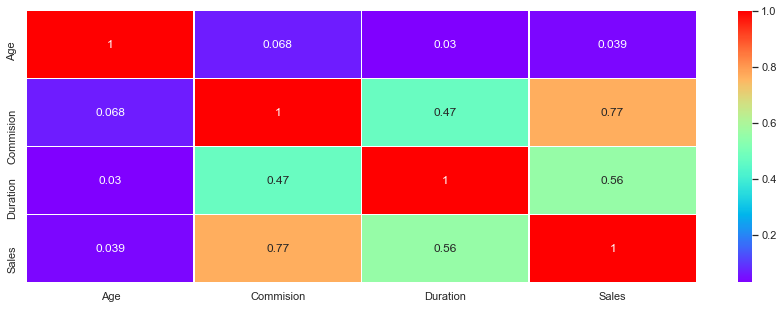

In [708]:
plt.figure(figsize=(15,5));
sns.heatmap(df.corr(),annot=True,cmap='rainbow',linecolor='white',linewidths=0.5);

In [709]:
# df.duplicated().sum()
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [710]:
df=df.drop_duplicates()
df.shape

(2861, 10)

## Outliers Detection and treatment:

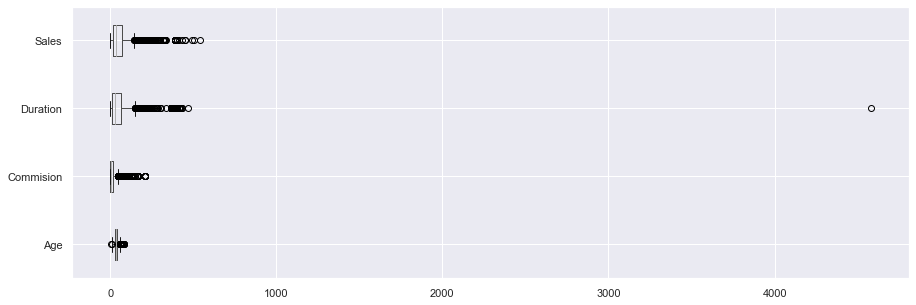

In [711]:
# construct box plot for continuous variables
plt.figure(figsize=(15,5))
df[['Age','Commision','Duration','Sales']].boxplot(vert=0)

In [636]:
def get_outliers(col):
    Q3=np.percentile(df[col],75) # value at 75 percentile
    Q1=np.percentile(df[col],25)  # value at 25 percentile
    IQR=Q3-Q1  # range
    Upper_limit=Q3 + 1.5 *(Q3 - Q1)
    Lower_limit=Q1 - 1.5 *(Q3 - Q1)
    outliers=df[(df[col]>Upper_limit) | (df[col]<Lower_limit) ]
    outlier_description= 'outliers in case of  ' + col + ' of  data.'
    print('There are', len(outliers), outlier_description)
    
# Looping

columns  =['Age','Commision','Duration','Sales']  # providing list for variable col.
for col in columns:
    get_outliers(col)

There are 130 outliers in case of  Age of  data.
There are 354 outliers in case of  Commision of  data.
There are 362 outliers in case of  Duration of  data.
There are 346 outliers in case of  Sales of  data.


In [637]:
# Treating outliers

def Treat_outliers(col):
    Q3=np.percentile(df[col],75) # value at 75 percentile
    Q1=np.percentile(df[col],25)  # value at 25 percentile
    IQR=Q3-Q1  # range
    Upper_limit=Q3 + 1.5 *(Q3 - Q1)
    Lower_limit=Q1 - 1.5 *(Q3 - Q1)
    df[col]=np.where(df[col]>Upper_limit,Upper_limit,df[col])      # capping with upper limit
    df[col]=np.where(df[col]<Lower_limit,Lower_limit,df[col])      # capping with lower limit


# Looping
columns  =['Age','Commision','Duration','Sales']  # providing list for variable col. # providing list for variable col.
for col in columns:
    Treat_outliers(col)

In [638]:
def get_outliers(col):
    Q3=np.percentile(df[col],75) # value at 75 percentile
    Q1=np.percentile(df[col],25)  # value at 25 percentile
    IQR=Q3-Q1  # range
    Upper_limit=Q3 + 1.5 *(Q3 - Q1)
    Lower_limit=Q1 - 1.5 *(Q3 - Q1)
    outliers=df[(df[col]>Upper_limit) | (df[col]<Lower_limit) ]
    outlier_description= 'outliers in case of  ' + col + ' of  data.'
    print('There are', len(outliers), outlier_description)
    

# Looping

columns  =['Age','Commision','Duration','Sales']  # providing list for variable col.
for col in columns:
    get_outliers(col)

There are 0 outliers in case of  Age of  data.
There are 0 outliers in case of  Commision of  data.
There are 0 outliers in case of  Duration of  data.
There are 0 outliers in case of  Sales of  data.


In [639]:
# for col in df[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']]:
#     if df[col].dtype == 'object':
#         df[col] = pd.Categorical(df[col]).codes 

In [640]:
df.shape

(2861, 10)

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(4), object(6)
memory usage: 245.9+ KB


### Converting all objects to categorical codes

In [642]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [643]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


#### Checking balance status of data

In [712]:
df.Claimed.value_counts(normalize=True)

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes

## 2.2 Data Split: Split the data into test and train (1.5 pts), build classification model CART (2 pts), Random Forest (2 pts), Artificial Neural Network(2 pts).	7.5


### Separating the dependent and Independent features and saving them in new objects

In [645]:
X = df.drop("Claimed" , axis=1)             # Independent features

Y = df.pop("Claimed")                       # dependent features

###  Splitting data into training and test set :


In [646]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1)

# Decision Tree Classifier

####  Building classification model for Decision Tree Classifier

In [647]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [648]:
# to check depth of tree splitting  
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_Tree_File = open('insurance_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Insurance_Tree_File.close()

The above code will save a .dot file in your working directory.
WebGraphviz is Graphviz in the Browser.
Copy paste the contents of the file into the link below to get the visualization
http://webgraphviz.com/

### DT Parameter Tuning using gridsearch:

In [649]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 6, 7, 8],
    'min_samples_leaf': [20, 24, 25,26,30],
    'min_samples_split': [70,100, 115,120]
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [650]:
# #### Training the DT model
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [20, 24, 25, 26, 30],
                         'min_samples_split': [70, 100, 115, 120]})

In [651]:
# checking best parameter values after parameter-tuning using gridsearch
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 100}

###  Model for CART:

In [652]:
# saving the best estimator as model for DT ( best_grid_DT_

best_grid_DT = grid_search.best_estimator_

# Random Forest Classifier

#### Parameter Tuning using gridsearch and Building classification model for Random Forest Classifier  :

In [653]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7,8,9],
    'max_features': [4, 5, 6],
    'min_samples_leaf': [5,10, 15],
    'min_samples_split': [20, 25,30],
    'n_estimators': [101,121, 151]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10,n_jobs=-1)



In [654]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [20, 25, 30],
                         'n_estimators': [101, 121, 151]})

In [655]:
# checking best parameter values after parameter-tuning using gridsearch
grid_search.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 151}

### Model for Random Forest Classifier:

In [656]:
# naming it as best_grid_RFC
best_grid_RFC = grid_search.best_estimator_

# MLP Classifier (Artificial Neural Network)

#### Scaling the dataset before ANN 


In [657]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

### Parameter Tuning using gridsearch and Building classification model for ANN :

In [658]:
from sklearn.neural_network import MLPClassifier
param_grid = {
    'hidden_layer_sizes': [[(81,81,81)],[100,100,100],[60,80,100]],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01,0.001],
    'max_iter' : [5000,7000,10000]
}

mlpc = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = mlpc, param_grid = param_grid, cv = 10, n_jobs=-1,verbose=True)

In [659]:
# Training the model
grid_search.fit(X_trains, train_labels)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 366 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 772 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 21.3min finished


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [[(81, 81, 81)], [100, 100, 100],
                                                [60, 80, 100]],
                         'max_iter': [5000, 7000, 10000],
                         'solver': ['sgd', 'adam'], 'tol': [0.1, 0.01, 0.001]},
             verbose=True)

In [660]:
# checking best parameter values after parameter-tuning using gridsearch
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': [60, 80, 100],
 'max_iter': 5000,
 'solver': 'adam',
 'tol': 0.1}

#### Model for ANN (MLP Classifier):

In [661]:
best_grid_ANN = grid_search.best_estimator_

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1.5 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Write inferences on each model (2 pts).	7.5


### Predictions and Performence Evaluation of different models:

# Decision Tree Classifier Performence 

In [662]:
# Prdiction using best_grid_DT 
ytrain_predict_dt = best_grid_DT.predict(X_train)
ytest_predict_dt = best_grid_DT.predict(X_test)

In [663]:
from sklearn.metrics import confusion_matrix,classification_report

In [664]:
### Confusion matrix of train data for Decision Tree Classifier 
       
pd.DataFrame(confusion_matrix(train_labels,ytrain_predict_dt))

,0,1
0,1203,156
1,286,357


In [665]:
### Confusion matrix of test data for Decision Tree Classifier 
pd.DataFrame(confusion_matrix(test_labels,ytest_predict_dt))

,0,1
0,521,67
1,125,146


#### Accuracy calculation from confusion matrix 

In [666]:
#Train Data Accuracy
cart_train_acc=best_grid_DT.score(X_train,train_labels) 
cart_train_acc.round(2)

0.78

In [667]:
#Test Data Accuracy
cart_test_acc=best_grid_DT.score(X_test,test_labels)
cart_test_acc.round(2)

0.78

### Also using classification report :

In [668]:
#classification report for train data
print(classification_report(train_labels,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84      1359
           1       0.70      0.56      0.62       643

    accuracy                           0.78      2002
   macro avg       0.75      0.72      0.73      2002
weighted avg       0.77      0.78      0.77      2002



In [669]:
cart_metrics=classification_report(train_labels,ytrain_predict_dt,output_dict=True)
df_dt=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df_dt.loc["1"][2],2)
cart_train_recall=round(df_dt.loc["1"][1],2)
cart_train_precision=round(df_dt.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.56
cart_train_f1  0.62


In [670]:
#classification report for train data
print(classification_report(test_labels,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       588
           1       0.69      0.54      0.60       271

    accuracy                           0.78       859
   macro avg       0.75      0.71      0.72       859
weighted avg       0.77      0.78      0.77       859



In [671]:
cart_metrics=classification_report(test_labels,ytest_predict_dt,output_dict=True)
df_dt=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df_dt.loc["1"][0],2)
cart_test_recall=round(df_dt.loc["1"][1],2)
cart_test_f1=round(df_dt.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.69
cart_test_recall  0.54
cart_test_f1  0.6


### Plotting ROC curve and getting ROC_AUC score for DTC model

AUC: 0.819


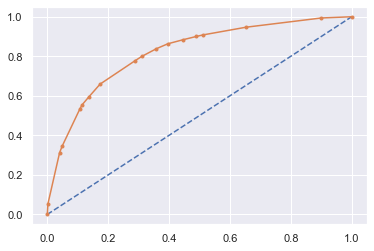

In [672]:
# AUC and ROC for the training data
# predict probabilities
probs_dt = best_grid_DT.predict_proba(X_train)
# keep probabilities for the positive outcome only. This will be in the form of table
probs_dt = probs_dt[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
 
cart_train_auc = roc_auc_score(train_labels, probs_dt)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
# if we want to look at fpr,tpr we can create the roc curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(train_labels, probs_dt)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, marker='.')
# show the plot
plt.show()

AUC: 0.794


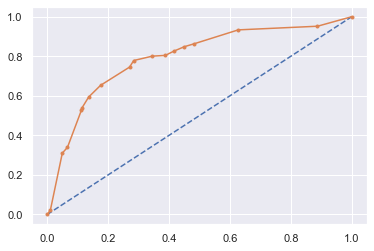

In [673]:
# AUC and ROC for the test data
# predict probabilities
probs_dt = best_grid_DT.predict_proba(X_test)
# keep probabilities for the positive outcome only. This will be in the form of table
probs_dt = probs_dt[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score

cart_test_auc = roc_auc_score(test_labels, probs_dt)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
# if we want to look at fpr,tpr we can create the roc curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(test_labels, probs_dt)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, marker='.')
# show the plot
plt.show()

## Inferences of DTC model:

*	Recall of train and test data is poor means model is not capable to predict claims out of actual claims properly. This model doenot solve our problem
*	But ROC_AUC score is good compared to ANN means its able to distinguish between target and non-targets in better way.This solves our problem upto some extent.

*	Precision is also ok  upto the level means model is able to give high ratio of true claims out of predicted claims but that is not our moto..
*	Hence F_score is also poor from where we can minimize our FN & FP.


# Random Forest Classifier Performence

In [674]:
# Prdiction using best_grid_RFC 
ytrain_predict_rfc = best_grid_RFC.predict(X_train)
ytest_predict_rfc = best_grid_RFC.predict(X_test)

### Confusion Matrix 

In [675]:
### Confusion matrix of train data for Random ForestClassifier 
       
pd.DataFrame(confusion_matrix(train_labels,ytrain_predict_rfc))

,0,1
0,1224,135
1,238,405


In [676]:
### Confusion matrix of test data for Random Forest Classifier 
       
pd.DataFrame(confusion_matrix(test_labels,ytest_predict_rfc))

,0,1
0,514,74
1,113,158


### Accuracy calculation from confusion matrix

In [677]:
rf_train_acc=best_grid_RFC.score(X_train,train_labels) 
rf_train_acc.round(2)

0.81

In [678]:
rf_test_acc=best_grid_RFC.score(X_test,test_labels)
rf_test_acc.round(2)

0.78

### Also using classification report :

In [679]:
#classification report for train data of Random Forest Classifier
print(classification_report(train_labels,ytrain_predict_rfc))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1359
           1       0.75      0.63      0.68       643

    accuracy                           0.81      2002
   macro avg       0.79      0.77      0.78      2002
weighted avg       0.81      0.81      0.81      2002



In [680]:
rf_metrics=classification_report(train_labels,ytrain_predict_rfc,output_dict=True)
df_rfc=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df_rfc.loc["1"][0],2)
rf_train_recall=round(df_rfc.loc["1"][1],2)
rf_train_f1=round(df_rfc.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.75
rf_train_recall  0.63
rf_train_f1  0.68


In [681]:
#classification report for test data for Random Forest Classifier
print(classification_report(test_labels,ytest_predict_rfc))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.58      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [682]:
rf_metrics=classification_report(test_labels,ytest_predict_rfc,output_dict=True)
df_rfc=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df_rfc.loc["1"][0],2)
rf_test_recall=round(df_rfc.loc["1"][1],2)
rf_test_f1=round(df_rfc.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.58
rf_test_f1  0.63


## Plotting ROC curve and getting ROC_AUC score for Random Forest model


AUC: 0.874


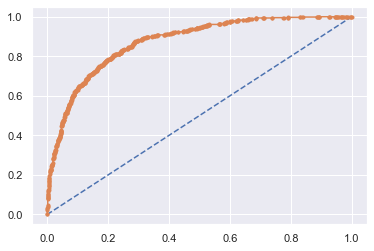

In [683]:
# AUC and ROC for the training data 
# predict probabilities
probs_rfc = best_grid_RFC.predict_proba(X_train)
# keep probabilities for the positive outcome only. This will be in the form of table
probs_rfc = probs_rfc[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
 
rf_train_auc = roc_auc_score(train_labels, probs_rfc)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
# if we want to look at fpr,tpr we can create the roc curve
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(train_labels, probs_rfc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rfc, tpr_rfc, marker='.')
# show the plot
plt.show()

AUC: 0.818


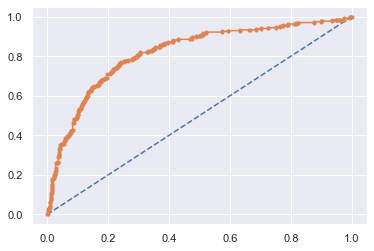

In [684]:
# AUC and ROC for the test data
# predict probabilities
probs_rfc = best_grid_RFC.predict_proba(X_test)
# keep probabilities for the positive outcome only. This will be in the form of table
probs_rfc = probs_rfc[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score

rf_test_auc = roc_auc_score(test_labels, probs_rfc)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
# if we want to look at fpr,tpr we can create the roc curve
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(test_labels, probs_rfc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rfc, tpr_rfc, marker='.')
# show the plot
plt.show()

### Inferences of Random Forest model:
* Recall of train and test data is better compared to other models  means model is capable to predict True positives(claims) out of actual claims better than others and this is what we want from our model for this case..
* Precision is also not upto the level and hence not able to predict True positives out of predicted positives.
* Hence F_score is also poor from where we can minimize our FN & FP.
* But ROC_AUC score is good upto some extent which shows that model is able to distinguish between claims and non-claims clearly and this is what we want from this model.


# ANN Model (MLP Classifier) Performence

In [685]:
# Prdiction using best_grid_ann 
ytrain_predict_ann = best_grid_ANN.predict(X_train)
ytest_predict_ann = best_grid_ANN.predict(X_test)

### Confusion Matrix

In [686]:
### Confusion matrix of train data for MLP Classifier 
       
pd.DataFrame(confusion_matrix(train_labels,ytrain_predict_ann))

,0,1
0,1125,234
1,334,309


In [687]:
### Confusion matrix of test data for MLP Classifier 
       
pd.DataFrame(confusion_matrix(test_labels,ytest_predict_ann))

,0,1
0,479,109
1,146,125


## Accuracy calculation from confusion matrix

In [688]:
# accuracy_train_data = (TN+TP)/(TN+TP+FP+FN)
accuracy_train_data = (885+443)/(885+443+586+186)
recall_train_data = (443)/(443+186)
precision_train_data =(443)/(443+586)
Fscore_train_data = 2*precision_train_data*recall_train_data/(precision_train_data+recall_train_data)

print ('accuracy of train data for ANN model is =  %.4f '% accuracy_train_data)
print ('recall of train data for ANN model is =  %.4f '% recall_train_data)
print ('precision of train data for ANN model is=  %.4f '% precision_train_data)
print ('Fscore of train data for ANN model is=  %.4f '% Fscore_train_data)

accuracy of train data for ANN model is =  0.6324 
recall of train data for ANN model is =  0.7043 
precision of train data for ANN model is=  0.4305 
Fscore of train data for ANN model is=  0.5344 


In [689]:
# accuracy_test_data = (TN+TP)/(TN+TP+FP+FN)
accuracy_test_data = (364+187)/(364+187+241+108)
recall_test_data = (187)/(187+108)
precision_test_data =(187)/(187+241)
Fscore_test_data = 2*precision_test_data*recall_test_data/(precision_test_data+recall_test_data)

print ('accuracy of test data for ANN model is=  %.4f '% accuracy_test_data)
print ('recall of test data for ANN model is =  %.4f '% recall_test_data)
print ('precision of test data for ANN model is=  %.4f '% precision_test_data)
print ('Fscore of test data for ANN model is =  %.4f '% Fscore_test_data)

accuracy of test data for ANN model is=  0.6122 
recall of test data for ANN model is =  0.6339 
precision of test data for ANN model is=  0.4369 
Fscore of test data for ANN model is =  0.5173 


In [690]:
nn_train_acc=best_grid_ANN.score(X_train,train_labels) 
nn_train_acc

0.7162837162837162

In [691]:
nn_test_acc=best_grid_ANN.score(X_test,test_labels)
nn_test_acc

0.7031431897555297

In [692]:
#classification report for train data of MLP Classifier
print(classification_report(train_labels,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1359
           1       0.57      0.48      0.52       643

    accuracy                           0.72      2002
   macro avg       0.67      0.65      0.66      2002
weighted avg       0.71      0.72      0.71      2002



In [693]:
nn_metrics=classification_report(train_labels,ytrain_predict_ann,output_dict=True)
df_nn=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df_nn.loc["1"][0],2)
nn_train_recall=round(df_nn.loc["1"][1],2)
nn_train_f1=round(df_nn.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.57
nn_train_recall  0.48
nn_train_f1  0.52


In [694]:
#classification report for test data for MLP Classifier
print(classification_report(test_labels,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       588
           1       0.53      0.46      0.50       271

    accuracy                           0.70       859
   macro avg       0.65      0.64      0.64       859
weighted avg       0.69      0.70      0.70       859



In [695]:
nn_metrics=classification_report(test_labels,ytest_predict_ann,output_dict=True)
df_nn=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df_nn.loc["1"][0],2)
nn_test_recall=round(df_nn.loc["1"][1],2)
nn_test_f1=round(df_nn.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.53
nn_test_recall  0.46
nn_test_f1  0.5


AUC: 0.731


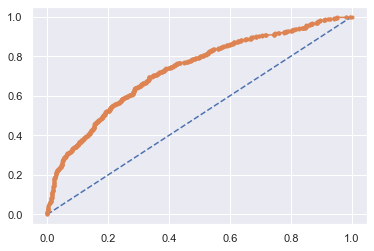

In [696]:
# AUC and ROC for the training data 
# predict probabilities
probs_ann = best_grid_ANN.predict_proba(X_train)
# keep probabilities for the positive outcome only. This will be in the form of table
probs_ann = probs_ann[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
 
nn_train_auc = roc_auc_score(train_labels, probs_ann)
print('AUC: %.3f' % nn_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
# if we want to look at fpr,tpr we can create the roc curve
fpr_ann, tpr_ann, thresholds_ann = roc_curve(train_labels, probs_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_ann, tpr_ann, marker='.')
# show the plot
plt.show()

AUC: 0.716


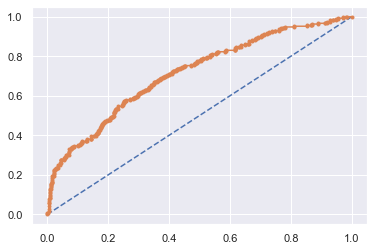

In [697]:
# AUC and ROC for the test data
# predict probabilities
probs_ann = best_grid_ANN.predict_proba(X_test)
# keep probabilities for the positive outcome only. This will be in the form of table
probs_ann = probs_ann[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score

nn_test_auc = roc_auc_score(test_labels, probs_ann)
print('AUC: %.3f' % nn_test_auc )
# calculate roc curve
from sklearn.metrics import roc_curve
# if we want to look at fpr,tpr we can create the roc curve
fpr_ann, tpr_ann, thresholds_ann = roc_curve(test_labels, probs_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_ann, tpr_ann, marker='.')
# show the plot
plt.show()

### Inferences of ANN model:
* Recall of train and test data is not good therefore model is not  capable to predict True positives(claims) out of actual claims claimed.This model does not solve our purpose.
* Precision is also not good and hence not able to predict True positives out of predicted positives.
* Hence F_score is also poor from where we can minimize our FN & FP.
* ROC_AUC score is lowest out of the three models and is very poor  which shows that model is able to distinguish between targets(claims) and non-targets(non-claims) properly hence this model also does not solve our problem.


##### CONCLUSION INFERENCE: Random Forest solves our problem upto some extent.

## 2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (3 pts). Describe on which model is best/optimized (2 pts ).	5


In [698]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.78,0.81,0.78,0.72,0.70
AUC,0.82,0.79,0.87,0.82,0.73,0.72
Recall,0.56,0.54,0.63,0.58,0.48,0.46
Precision,0.70,0.69,0.75,0.68,0.57,0.53
F1 Score,0.62,0.60,0.68,0.63,0.52,0.50


## Our purpose of making a model is to detect claims more accurately and how well our model can distinguish between  claims and non-claims.

### Therefore finally in terms of performence metrics our priority order should be-
1. Recall - Predicting  claims out of actual claims with high rate
2. ROC_score  - This tells us that how well model is able to differentiate between actual targets(claims) and non Targets(No claims)
3. Accuracy- How much model is able to detect maximum of TP & TN (claims and non claims) but it can be seudo accuracy because in terms of ratio it can be good but has not able to detct claims properly which is our target and not the non-claims.

3. High Precision- High TP and low FP ( Predicting  correctly for  actual claiming travellers should be high and prdicting wrongly No for actualy not claimng travellers)

## Recall >AUC > Accuracy > Precision >  F1 Score

#### From Above tabular form of performences of different models let us see which performence is winner in which model:

#### Recall - Random Forest is winner.
#### AUC -   Random Forest is winner.
#### Accuracy - Random Forest and DT is winner.
####  Precision - Random Forest is winner.
#### F1 Score -  Random Forest is winner.
# Therefore we can say that Random Forest is the best model for this case.

## 2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.	5

# Recommondations:
1. Insurance firm can charge more from travellers whose prediction of claim is yes.
2. Insurance firm can charge less to  travellers whose prediction of  of claim for the insurance is no and can lure more customers.
2. This will have impact on number of insurance bookings and claims. Some percentage of customers whom chances of  claims are high/yes  will avoid to take insurances at high charges, decreasing the claim percentage and increasing the sales amount .
3. Where as travellers with prediction of not  claiming the insurance will be able to enjoy the insurances at low price and will be a profitable chunk of customers for the insurance firm.

4. The first quartile commision value is zero which indicates that distribution channels are not getting commision on 25% of the insurances booked and need to check on these cases to increase the earnings of channel partners for improvement on this product sale.
5. To promote more sales, commision amount should be as per sales value.

#### Our purpose of finding correct prediction should be to correctly predict/detect TP(claims) out of actual positives as well as minimum number of FN ,
High TP - Will charge more.

Low FN - Will ensure to minimize the detection of actual claiming travellers and loosing higher rate of insurance charges from them 